In [ ]:
#Aidan Freund 
#CIS 2532 HW 11 Pt3A
# A taken from GitHub user "Josephlee94"
# project "intuitive deep learning" 
# with my own comments

In [1]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 27s 0us/step


In [2]:
#training the model considering a certain dimension
#32 by 32 pixels, and 3 deep(rgb), with 50k images to train form
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [3]:
print('y_train shape:', y_train.shape)

y_train shape: (50000, 1)


In [4]:
print(x_train[0])
#How the computer 'sees' an image

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

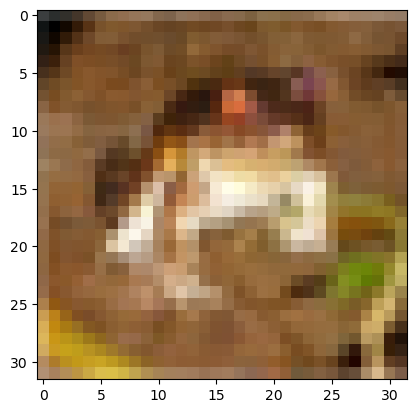

In [6]:
img = plt.imshow(x_train[0])

In [7]:
print('The label is:', y_train[0])

The label is: [6]


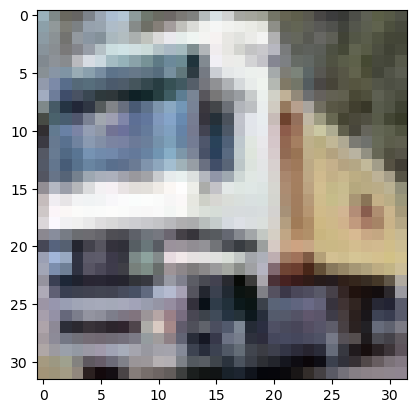

In [8]:
img = plt.imshow(x_train[1])

In [9]:
print('The label is:', y_train[1])
#the labels corespond to the character of the object

The label is: [9]


In [10]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [11]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [13]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [15]:
#Building and training the model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [16]:
model = Sequential()

In [17]:
#here is the first layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

In [18]:
#second layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [19]:
#third
model.add(MaxPooling2D(pool_size=(2, 2)))

In [20]:
#if the model isnt more than 25% sure, it will not label
model.add(Dropout(0.25))

In [21]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(512, activation='relu'))

In [24]:
model.add(Dropout(0.5))

In [25]:
model.add(Dense(10, activation='softmax'))

In [26]:
#The summary of the model just made
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [28]:
#trains with optimization called 'adam'
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 143s 113ms/step - loss: 1.5522 - accuracy: 0.4317 - val_loss: 1.2544 - val_accuracy: 0.5431
Epoch 2/20
1250/1250 [==============================] - 148s 118ms/step - loss: 1.1322 - accuracy: 0.5950 - val_loss: 0.9770 - val_accuracy: 0.6526
Epoch 3/20
1250/1250 [==============================] - 141s 113ms/step - loss: 0.9901 - accuracy: 0.6492 - val_loss: 0.8692 - val_accuracy: 0.6911
Epoch 4/20
1250/1250 [==============================] - 133s 107ms/step - loss: 0.8878 - accuracy: 0.6866 - val_loss: 0.7991 - val_accuracy: 0.7219
Epoch 5/20
1250/1250 [==============================] - 137s 109ms/step - loss: 0.8173 - accuracy: 0.7134 - val_loss: 0.7732 - val_accuracy: 0.7290
Epoch 6/20
1250/1250 [==============================] - 138s 110ms/step - loss: 0.7608 - accuracy: 0.7305 - val_loss: 0.7384 - val_accuracy: 0.7456
Epoch 7/20
1250/1250 [==============================] - 135s 108ms/step - loss: 0.7136 - accuracy: 0.7478 - val_

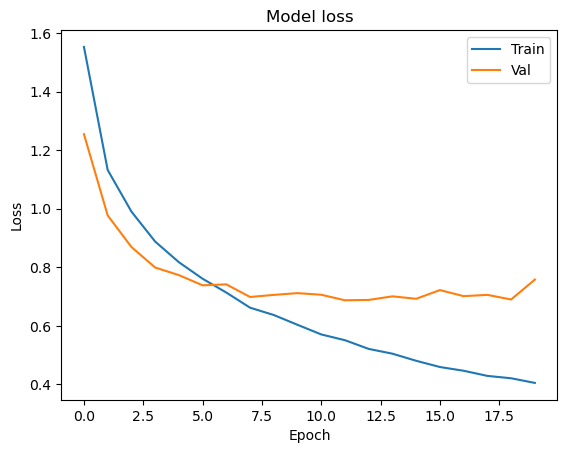

In [30]:
#all the plotting of model accuracy
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

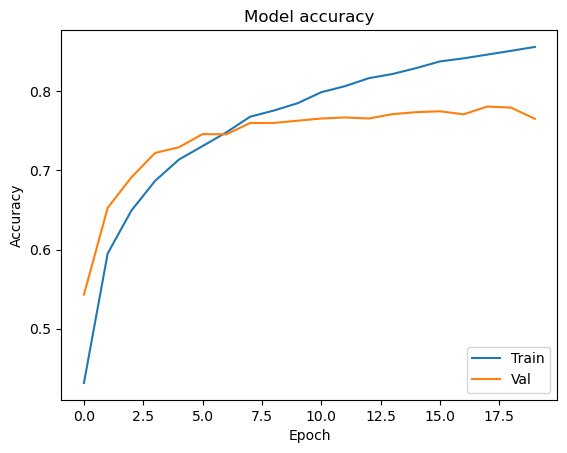

In [32]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [33]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 15ms/step - loss: 0.7833 - accuracy: 0.7594


0.7594000101089478

In [34]:
#Save model to hdf5 format
model.save('my_cifar10_model.h5')